### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data Dict.

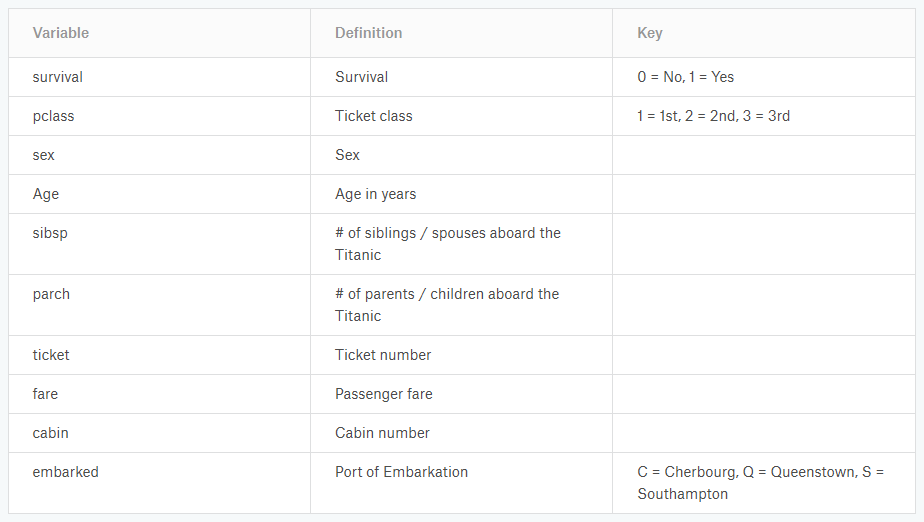

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  Let's Start EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [12]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

###  Checking Missing Vales Percentage

In [13]:
(df.isnull().sum()/891)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

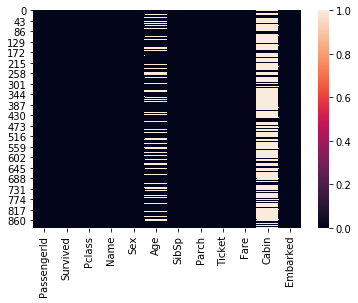

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.drop(columns=['Cabin'], axis=1, inplace=True)

Cabin column is dropped because it has 77 percent missing values so  its diifcult to impute it with any method

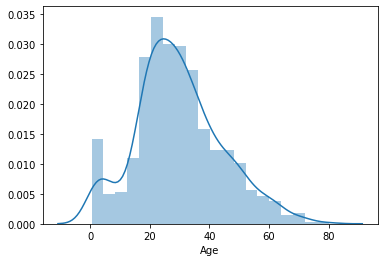

In [16]:
sns.distplot(df["Age"])

In [17]:
mean = df["Age"].mean()
df["Age"] = df["Age"].fillna(mean)

Mean imputation method is used here to fill age values

In [ ]:
df["Embarked"].value_counts()

In [19]:
df["Embarked"] = df["Embarked"].fillna("S")

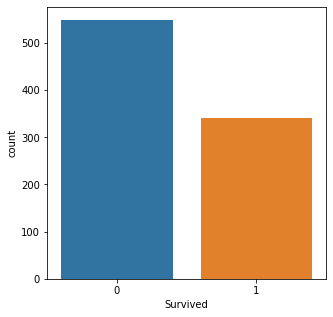

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(df['Survived'])


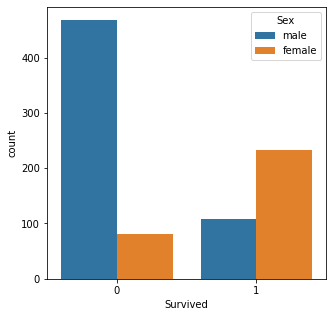

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(df['Survived'], hue=df['Sex'])

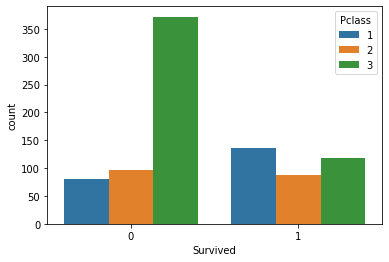

In [22]:
sns.countplot(df['Survived'], hue=df["Pclass"])

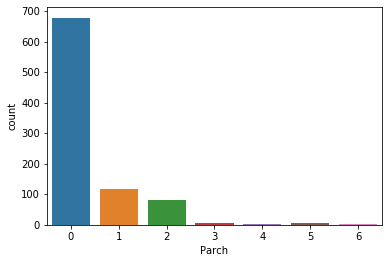

In [23]:
sns.countplot(df['Parch'])

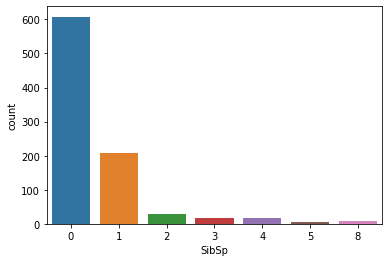

In [24]:
sns.countplot(df['SibSp'])

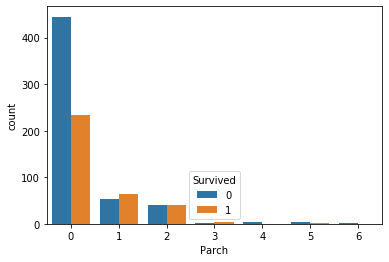

In [25]:
sns.countplot(df["Parch"], hue=df['Survived'])

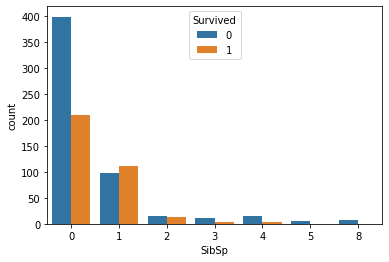

In [26]:
sns.countplot(df['SibSp'], hue=df["Survived"])

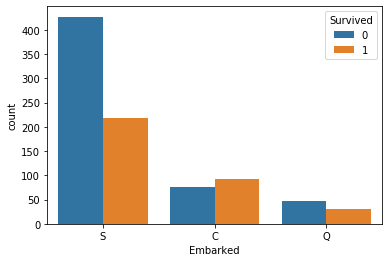

In [27]:
sns.countplot(df['Embarked'], hue=df["Survived"])

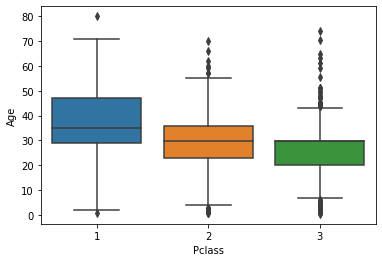

In [28]:
sns.boxplot(df['Pclass'],df['Age'] )

###  Treating Outliers

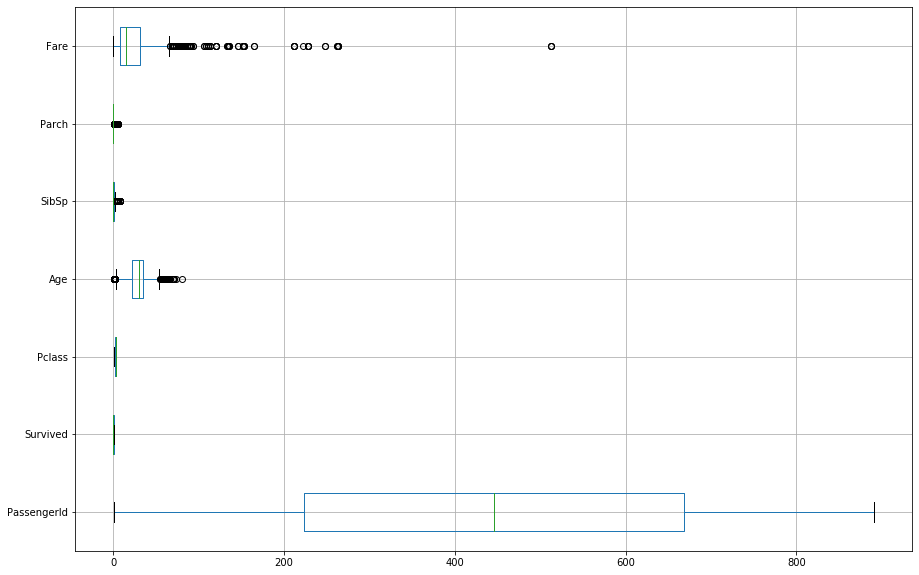

In [29]:
plt.figure(figsize=(15,10))
df.boxplot(vert = 0)

In [30]:
print(df['Fare'].quantile(0.25))
print(df['Fare'].quantile(0.75))

7.9104
31.0


In [31]:
df["Fare"] = np.where(df["Fare"] <7.0, 7.0,df['Fare'])
df["Fare"] = np.where(df["Fare"] >31.0, 31.0,df['Fare'])
print(df['Fare'].skew())

0.2604958173883201


In [32]:
print(df['Age'].quantile(0.25))
print(df['Age'].quantile(0.75))

22.0
35.0


In [33]:
df["Age"] = np.where(df["Age"] <22.0, 22.0,df['Age'])
df["Age"] = np.where(df["Age"] >35.0, 35.0,df['Age'])
print(df['Age'].skew())

-0.11218901861815189


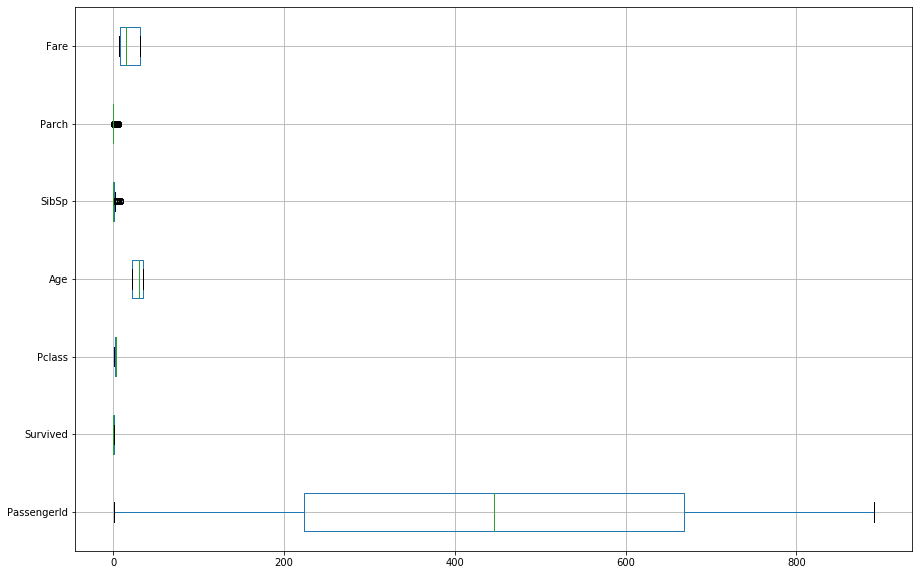

In [34]:
plt.figure(figsize=(15,10))
df.boxplot(vert = 0)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
df["Sex_n"] = le.fit_transform(df["Sex"])
df["Pclass_n"] = le.fit_transform(df["Pclass"])
df["Embarked_n"] = le.fit_transform(df["Embarked"])

In [37]:
df = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Embarked'], axis = 1)

In [38]:
df.head()

,Survived,SibSp,Parch,Fare,Sex_n,Pclass_n,Embarked_n
0,0,1,0,7.250,1,2,2
1,1,1,0,31.000,0,0,0
2,1,0,0,7.925,0,2,2
3,1,1,0,31.000,0,0,2
4,0,0,0,8.050,1,2,2


In [39]:
x = df.drop('Survived', axis =1)
y = df[['Survived']]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

C:\Users\Krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
pred_class_logistic = lrmodel.predict(x)
pred_class_logistic

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [53]:
pred_class_logistic_prob = lrmodel.predict_proba(x)
pred_class_logistic_prob

array([[0.92999831, 0.07000169],
       [0.08512266, 0.91487734],
       [0.41317375, 0.58682625],
       ...,
       [0.41572196, 0.58427804],
       [0.51041666, 0.48958334],
       [0.89093727, 0.10906273]])

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
y_train_predict = lrmodel.predict(x_train)

In [47]:
confusion_matrix(y_train, y_train_predict)

array([[346,  50],
       [ 66, 161]], dtype=int64)

In [48]:
y_test_predict = lrmodel.predict(x_test)

In [49]:
confusion_matrix(y_test, y_test_predict)

array([[132,  21],
       [ 43,  72]], dtype=int64)

In [50]:
lrmodel.intercept_

array([2.41992993])

In [51]:
lrmodel.intercept_

array([2.41992993])

In [43]:
lrmodel.score(x_train, y_train)

0.8138041733547352

In [44]:
lrmodel.score(x_test, y_test)

0.7611940298507462

### The test score is 76.1 % so its performing good, We can consider it for production